# Simple Linear regression technique


In [6]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X+np.random.rand(100,1)

X_b=np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.49338851],
       [3.00404387]])

In [14]:
X_new = np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.49338851],
       [10.50147625]])

# plot the prediction

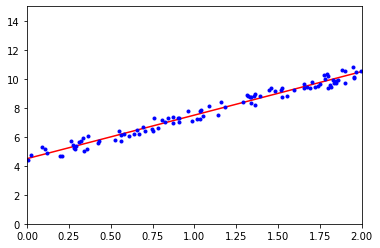

In [16]:
import matplotlib.pyplot as plt

plt.plot(X_new,y_pred,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# Using scikit learn

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.49338851],
       [10.50147625]])

# Batch gradiet descent

In [20]:
eta = 0.1
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iteration):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients

array([[1.49397199],
       [0.52502517]])

# Stochastic gradient descent

In [31]:
n_epoch = 50
t0,t1 = 5,50

def learning_policy(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        grad = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_policy(epoch*m+i)
        theta = theta-eta*gradients

[[1.         0.33358973]]


In [26]:
theta


array([[ 1.31289284],
       [-0.02135069]])

# Polynomial regression

In [40]:
m = 100
X = 6*np.random.rand(m,1)-3
y= 0.5*X**2+X+2+np.random.randn(m,1)

from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_feature.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.99336329]), array([[0.94011371, 0.50439275]]))

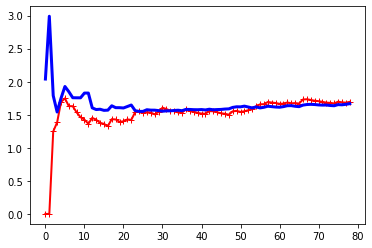

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
        
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label = "train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth = 3,label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)


# Decision boundaries

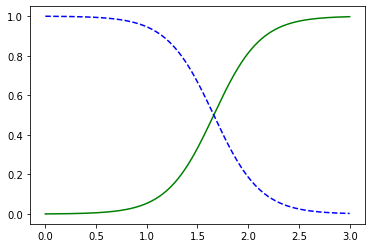

In [65]:
from sklearn import datasets

iris = datasets.load_iris()
# list(iris.keys())
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

# Logistiv regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
# print(y_proba)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-virginica")

# Softmax regression

In [66]:
X = iris["data"][:,(2,3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver = "lbfgs",C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
softmax_reg.predict([[5,2]])

array([2])